<a href="https://colab.research.google.com/github/sunraku00/KNAPSACK-PROBLEM-/blob/main/dataset_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [3]:
print("⬆️ Silakan upload file kamu")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("\n✅ Data berhasil dibaca!")

⬆️ Silakan upload file kamu


Saving mentalhealth - Form Responses 1.csv to mentalhealth - Form Responses 1.csv

✅ Data berhasil dibaca!


In [4]:
df.columns = df.columns.str.strip().str.replace('\n', '', regex=True)

print("\n📋 Daftar kolom setelah dibersihkan:")
print(list(df.columns))


📋 Daftar kolom setelah dibersihkan:
['Timestamp', 'Nama', 'Fakultas', 'Program Studi', 'Frekuensi aktivitas fisik/olahraga dalam seminggu', 'Berapa lama waktu istirahat (selain tidur) dalam sehari?', 'Rata-rata waktu belajar Anda per hari', 'Rata-rata jam tidur Anda per hari', 'Jumlah mata kuliah yang diambil minggu ini', 'Total jam kuliah per minggu', 'Apakah tugas kuliah Anda sedang menumpuk', 'Seberapa sering Anda mengikuti kuliah online dalam seminggu?', 'Saya merasa sulit berkonsentrasi saat belajar.', 'Saya merasa kelelahan secara fisik maupun mental.', 'Saya merasa khawatir dengan tugas atau ujian yang akan datang.', 'Saya sering merasa gelisah atau mudah marah.', 'Saya mengalami kesulitan tidur karena pikiran yang menumpuk.', 'Saya merasa tidak punya cukup waktu untuk diri sendiri.']


In [5]:
aktivitas_cols = [
    "Frekuensi aktivitas fisik/olahraga dalam seminggu",
    "Berapa lama waktu istirahat (selain tidur) dalam sehari?",
    "Rata-rata waktu belajar Anda per hari",
    "Rata-rata jam tidur Anda per hari",
    "Jumlah mata kuliah yang diambil minggu ini",
    "Total jam kuliah per minggu",
    "Apakah tugas kuliah Anda sedang menumpuk"
]

stres_cols = [
    "Saya merasa sulit berkonsentrasi saat belajar.",
    "Saya merasa kelelahan secara fisik maupun mental.",
    "Saya merasa khawatir dengan tugas atau ujian yang akan datang.",
    "Saya sering merasa gelisah atau mudah marah.",
    "Saya mengalami kesulitan tidur karena pikiran yang menumpuk.",
    "Saya merasa tidak punya cukup waktu untuk diri sendiri."
]

In [6]:
le = LabelEncoder()
for col in aktivitas_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [7]:
df["skor_stres"] = df[stres_cols].mean(axis=1)

In [8]:
X = df[aktivitas_cols]
Y = df["skor_stres"]

In [9]:
X = sm.add_constant(X)

In [10]:
model = sm.OLS(Y, X).fit()

In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             skor_stres   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     2.485
Date:                Thu, 23 Oct 2025   Prob (F-statistic):             0.0379
Time:                        03:58:13   Log-Likelihood:                -43.671
No. Observations:                  39   AIC:                             103.3
Df Residuals:                      31   BIC:                             116.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

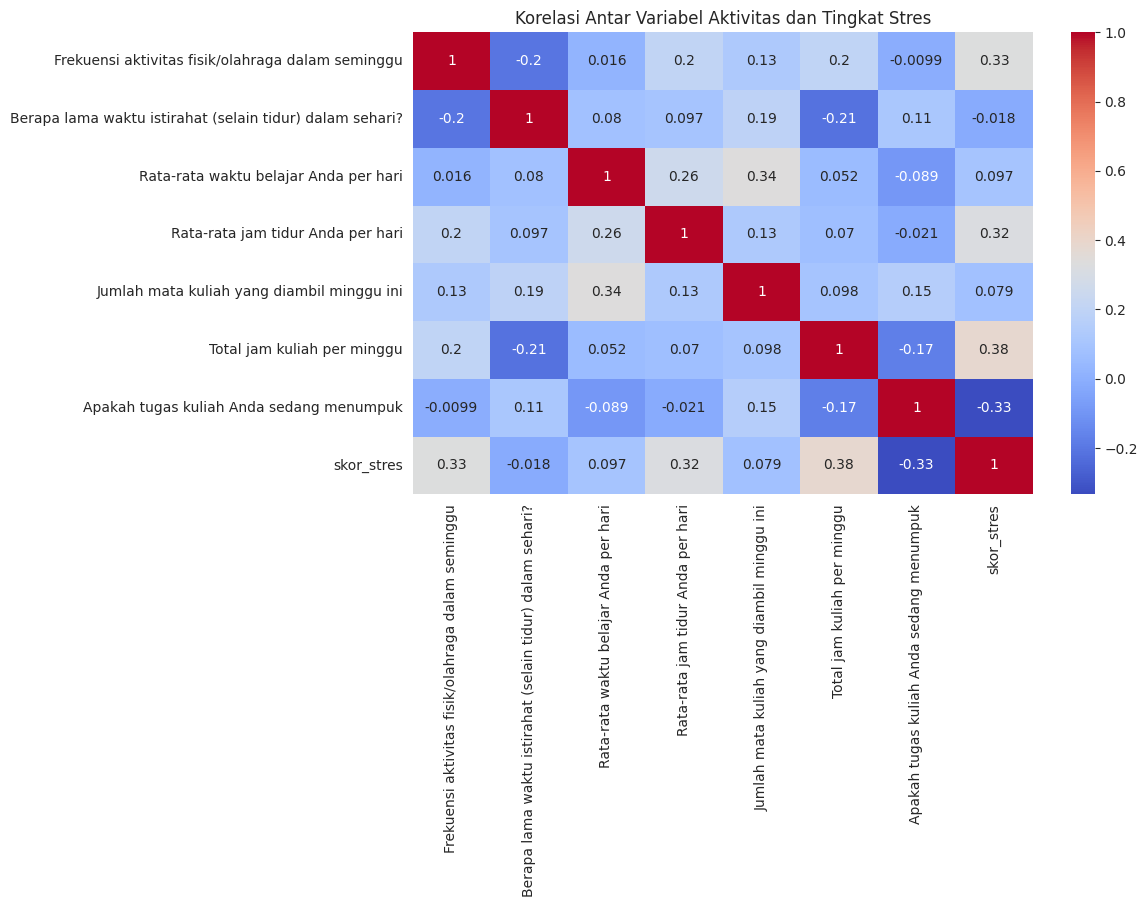

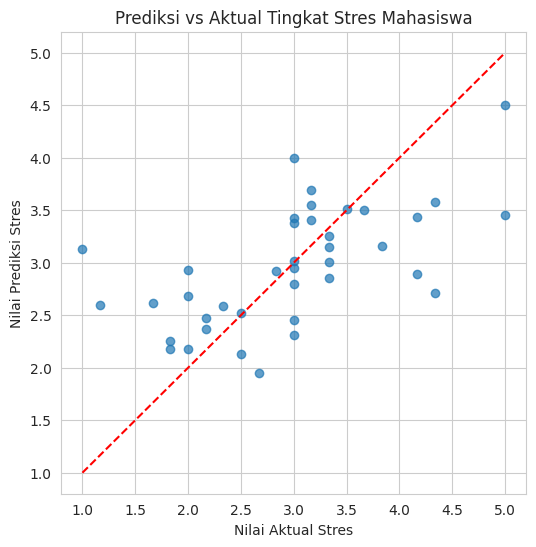

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df[aktivitas_cols + ["skor_stres"]].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Variabel Aktivitas dan Tingkat Stres")
plt.show()


df["prediksi_stres"] = model.predict(X)

plt.figure(figsize=(6,6))
plt.scatter(Y, df["prediksi_stres"], alpha=0.7)
plt.xlabel("Nilai Aktual Stres")
plt.ylabel("Nilai Prediksi Stres")
plt.title("Prediksi vs Aktual Tingkat Stres Mahasiswa")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')
plt.show()

In [13]:
with open("hasil_regresi_stres.txt", "w") as f:
    f.write(model.summary().as_text())

print("📄 Hasil regresi disimpan sebagai 'hasil_regresi_stres.txt'")


📄 Hasil regresi disimpan sebagai 'hasil_regresi_stres.txt'
